In [1]:
import statsmodels.api as sm
import statsmodels.tsa.statespace as statespace
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
%matplotlib inline

In [2]:
file_dir=os.getcwd()[:-6]+ 'Data/'

In [3]:
#Pull data
df = pd.read_csv(file_dir+'interim/final_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Sotiris\\Documents\\GitHub\\STAD95_W23\\Data/interim/final_data.csv'

In [140]:
df['Date']=pd.to_datetime(df['Date'])

In [141]:
df=df[df['Date']<datetime.datetime(2023,1,1)]

In [142]:
df1=df[['Date','Price']]
df2=df[['Date','Ontario Demand']]

In [143]:
price_train=df1[df1['Date']<datetime.datetime(2022,1,1)]
price_test=df1[df1['Date']>=datetime.datetime(2022,1,1)]
demand_train=df2[df2['Date']<datetime.datetime(2022,1,1)]
demand_test=df2[df2['Date']>=datetime.datetime(2022,1,1)]

In [144]:
price_train=price_train.set_index('Date')
price_test=price_test.set_index('Date')
demand_train=demand_train.set_index('Date')
demand_test=demand_test.set_index('Date')

## Dynamic Factor model (Price)

In [145]:
res_dfm.predict

statsmodels.tsa.statespace.dynamic_factor_mq.DynamicFactorMQ

In [155]:
# Create a dynamic factor model
mod_dfm = sm.tsa.DynamicFactorMQ(price_train, k_factors=1, factor_order=2)
# Note that mod_dfm is an instance of the DynamicFactorMQ class

# Fit the model via maximum likelihood, using the EM algorithm
res_dfm = mod_dfm.fit()
# Note that res_dfm is an instance of the DynamicFactorMQResults class

# Show the summary of results
print(res_dfm.summary())

#forecast = res_dfm.predict(start = datetime.datetime(2022,1,1),end=datetime.datetime(2023,1,1),dynamic=True)
forecast = res_dfm.get_forecast(8760)

#forecast = pd.DataFrame(forecast).rename(columns={'predicted_mean':'Price'})
MSE = np.square(forecast-price_test).mean()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


                               Dynamic Factor Results                              
Dep. Variable:                       Price   No. Observations:                17543
Model:                Dynamic Factor Model   Log Likelihood              -22888.908
                   + 1 factors in 1 blocks   AIC                          45787.816
                     + AR(1) idiosyncratic   BIC                          45826.678
Date:                     Mon, 06 Feb 2023   HQIC                         45800.612
Time:                             17:51:05   EM Iterations                        3
Sample:                         01-01-2020                                         
                              - 12-31-2021                                         
Covariance Type:              Not computed                                         
                    Observation equation:                     
Factor loadings:          0    idiosyncratic: AR(1)       var.
----------------------------------

TypeError: Cannot broadcast np.ndarray with operand of type <class 'statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper'>

In [154]:
forecast.prediction_results.forecasts

array([[0.10489967, 0.04738668, 0.02140615, ..., 0.        , 0.        ,
        0.        ]])

In [150]:
MSE

Price    2003.904661
dtype: float64

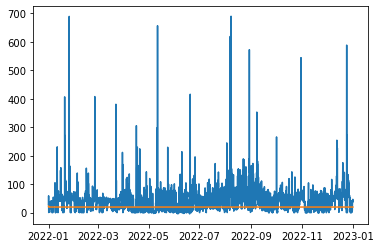

In [151]:
plt.plot(price_test)+ plt.plot(forecast)

In [99]:
forecast.head(20)

,Price
2022-01-01 00:00:00,22.589763
2022-01-01 01:00:00,20.999556
2022-01-01 02:00:00,20.281206
2022-01-01 03:00:00,19.956704
2022-01-01 04:00:00,19.810115
2022-01-01 05:00:00,19.743896
2022-01-01 06:00:00,19.713983
2022-01-01 07:00:00,19.700470
2022-01-01 08:00:00,19.694366
2022-01-01 09:00:00,19.691608


## Dynamic Factor model (Demand)

In [100]:
# Create a dynamic factor model
mod_dfm = sm.tsa.DynamicFactorMQ(demand_train, k_factors=1, factor_order=2)
# Note that mod_dfm is an instance of the DynamicFactorMQ class

# Fit the model via maximum likelihood, using the EM algorithm
res_dfm = mod_dfm.fit()
# Note that res_dfm is an instance of the DynamicFactorMQResults class

# Show the summary of results
print(res_dfm.summary())

forecast = res_dfm.predict(start = datetime.datetime(2022,1,1),end=datetime.datetime(2023,1,1),dynamic=False)
forecast = pd.DataFrame(forecast).rename(columns={'predicted_mean':'Ontario Demand'})
MSE = np.square(forecast-demand_test).mean()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/dynamic_factor_mq.py:2671: UserWarning: EM reached maximum number of iterations (500), without achieving convergence: llf=221.04, convergence criterion=3.8887e-06 (while specified tolerance was 1e-06)
  warn(f'EM reached maximum number of iterations ({maxiter}),'


                               Dynamic Factor Results                              
Dep. Variable:              Ontario Demand   No. Observations:                17543
Model:                Dynamic Factor Model   Log Likelihood                 221.043
                   + 1 factors in 1 blocks   AIC                           -432.086
                     + AR(1) idiosyncratic   BIC                           -393.224
Date:                     Mon, 06 Feb 2023   HQIC                          -419.290
Time:                             15:34:14   EM Iterations                      500
Sample:                         01-01-2020                                         
                              - 12-31-2021                                         
Covariance Type:              Not computed                                         
                    Observation equation:                     
Factor loadings:          0    idiosyncratic: AR(1)       var.
----------------------------------

In [101]:
MSE

Ontario Demand    5.624416e+06
dtype: float64

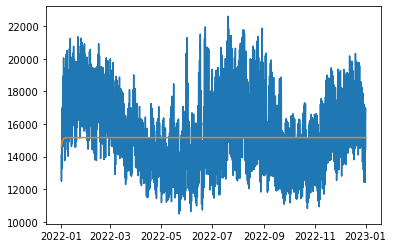

In [102]:
plt.plot(demand_test)+ plt.plot(forecast)

## Kalman Filter(Price)

In [103]:
#price_train = price_train.reset_index()
price_train['Price'].to_numpy()

In [126]:
ss_model = statespace.kalman_filter.KalmanFilter(price_train['Price'].to_numpy(), k_states =1)
statespace.kalman_filter.FilterResults(ss_model)
forecast = statespace.kalman_filter.PredictionResults(result,nforecast=10)

KeyError: 'd'